**Table of contents**<a id='toc0_'></a>    
- [Getting Started](#toc1_)    
- [Setting up the environment](#toc2_)    
- [Load the dataset into Storage Bucket from BigQuery](#toc3_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# <a id='toc1_'></a>[Getting Started](#toc0_)

In [ ]:
gcloud auth logins

In [ ]:
gcloud config set project burner-yasshaik1

# <a id='toc2_'></a>[Setting up the environment](#toc0_)

In [ ]:
# Step 1: Ensure you have virtualenv installed to install any GCP Package
pip install virtualenv

# Step 2: Create a virtual environment (replace 'myenv' with your desired environment name)
virtualenv myenv

# Step 3: Activate the virtual environment
# On Windows
myenv\Scripts\activate
# On macOS/Linux
source myenv/bin/activate

# Step 4: Upgrade pip (optional but recommended)
pip install --upgrade pip

# Step 5: Install the Google Cloud Pub/Sub package
pip install google-cloud-bigquery

# <a id='toc3_'></a>[Load the dataset into Storage Bucket from BigQuery](#toc0_)

In [ ]:
from google.cloud import bigquery

client = bigquery.Client()

project = "burner-yasshaik1"
dataset_id = "dataset_sample"
table_id = "employee_data" 

dataset_ref = bigquery.DatasetReference(project, dataset_id)
table_ref = dataset_ref.table(table_id)
print("Table Reference: ", table_ref)


bucket_name = 'gcp_sample_datasets' 
destination_uri = "gs://{}/loaded_data.csv".format(bucket_name)

extract_job = client.extract_table(
    table_ref,
    destination_uri,
    # Location must match that of the source table.
    location="us-central1",
)  # API request
extract_job.result()  # Waits for job to complete.

print("Data is Loaded into Storage Bucket")

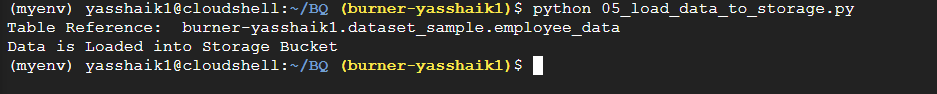

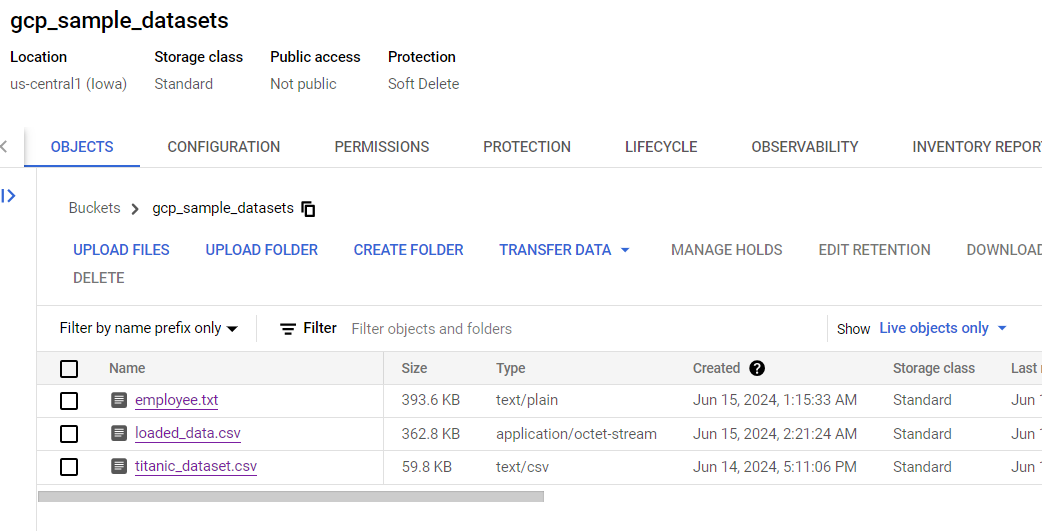